In [1]:
%%html 
<html>
    display this 
</html> 

In [2]:
%%html
<html>
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta http-equiv="X-UA-Compatible" content="ie=edge" />
    <title>AnzoGraph Geospatial Analytics</title>
    <link
      rel="icon"
      href="http://csi-gluu.cambridgesemantics.com/oxauth/ext/resources/img/favicon_icosahedron.ico"
    />
    <!-- Latest compiled and minified CSS -->
    <script
      type="text/javascript"
      src="https://ajax.googleapis.com/ajax/libs/jquery/1.9.1/jquery.min.js?ver=4.8"
    ></script>
    <link
      rel="stylesheet"
      href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css"
      integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u"
      crossorigin="anonymous"
    />

    <!-- Latest compiled and minified JavaScript -->
    <script
      src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"
      integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa"
      crossorigin="anonymous"
    ></script>
    <link rel="stylesheet" href="/Users/tcook/notebooks/resources/css/index.css" />
    <link
      href="https://fonts.googleapis.com/css?family=Roboto&display=swap"
      rel="stylesheet"
    />
    <link rel="stylesheet" href="https://js.arcgis.com/4.14/esri/css/main.css">
    <script src="https://js.arcgis.com/4.14/"></script>
    <script type="text/javascript" src="https://gmousse.github.io/dataframe-js/dist/dataframe.min.js"></script>
    <script type="text/javascript" src="azg.js"></script>
    <script>
      
      function show_polygon() {
        let pt_query = "select ?point_latitude ?point_longitude ?policyID from <FLORIDA_INSURANCE_DATASET> where{ ?policy a <http://florida_insurance/Policy>; <policyID> ?policyID; <point_latitude> ?point_latitude; <point_longitude> ?point_longitude. }";
        let ra = document.getElementById("polygonView");
        azg.create_dataframe(pt_query).then((df)=> {
            ra.innerHTML = "";
        require([
              "esri/Map",
              "esri/views/MapView",
              "esri/Graphic",
              "esri/layers/GraphicsLayer"
            ], function(Map, MapView, Graphic, GraphicsLayer) {
              var map   = new Map({
                basemap: "topo-vector"
              });
              var graphicsLayer = new GraphicsLayer();
              map.add(graphicsLayer);
              
              df.map(row => {
                var point = {
                    type: "point",
                    longitude: row.get('point_longitude'),
                    latitude: row.get('point_latitude')
                  };

                  var simpleMarkerSymbol = {
                    type: "simple-marker",//row.get('policyID'),
                    color: [226, 119, 40],  // orange
                    outline: {
                      color: [255, 255, 255], // white
                      width: 1
                    }
                  };

                  var pointGraphic = new Graphic({
                    geometry: point,
                    symbol: simpleMarkerSymbol
                  });

                  graphicsLayer.add(pointGraphic);
              });
              let polygon_query = "PREFIX geo: <http://cambridgesemantics.com/anzograph/geospatial#> select (geo:as_json(geo:agg_polygon(geo:point_from_xy(?lon, ?lat))) as ?polygon) where { values (?lon ?lat) {(-82.298984489994 26.837559967283) (-82.18984489994 27.3215816298725) (-82.491432890735 27.6163883241613) (-82.691432890735 27.6215816298725) (-82.691432890735 27.415816298725)} }";
              azg.create_dataframe(polygon_query).then((df)=> {
                df.map(row => {
                  
                  var obj = JSON.parse(row.get('polygon'));
                var polygon = {
                    type: "polygon",
                    rings:obj.rings[0]
                  };

                  var simpleMarkerSymbol = {
                    type: "simple-line",//row.get('policyID'),
                    color: [226, 119, 40],  // orange
                    outline: {
                      color: [255, 255, 255], // white
                      width: 6
                    }
                  };

                  var polygonGraphic = new Graphic({
                    geometry: polygon,
                    symbol: simpleMarkerSymbol
                  });

                  graphicsLayer.add(polygonGraphic);
                });
                }).catch((err) => {
                  ra.innerHTML = err;
                }); 
              var view = new MapView({
              container: "polygonView",
              map: map,
              center: [-81.991432890735, 27.3215816298725],
              zoom: 10
            });
          });
        }).catch((err) => {
          ra.innerHTML = err;
        }); 
      }
      window.onload=show_polygon;
    </script>
  </head>
  <body>
    <nav class="navbar navbar-default navbar-main">
      <div
        class="container-fluid"
        style="display: flex; padding-top: 10px; padding-bottom: 10px;"
      >
        <div class="navbar-header" style="flex:1">
          <a
            class="navbar-brand logo-padding"
            href="https://www.cambridgesemantics.com/anzograph/"
            style="padding-left: 16px;"
          >
            <img
              alt="Brand"
              src="/Users/tcook/notebooks/resources/images/anzographlogo-white.png"
              height="40px"
              width="45%"
            />
          </a>          
        </div>
        <div style="flex:1.7; align-self: center;">
          <div style="color: white; font-size: 22px">
            AnzoGraph Geospatial Analytics
          </div>
        </div>
        <div style="flex:0"></div>
      </div>
    </nav>
    <div class="form-group"></div>
    <div
      class="container-fluid"
      style="background-color: #FFFFFF;"
    >
        <div>
            <div style="width: 100%;" align="right"><a style="margin: 5px;" href="visualize_raw_data.html"><button>prev</button></a><a style="margin: 5px;" href="filtered_polygon.html"><button>next</button></a></div>
                <div><b>Lets try to build Polygon in AnzoGraph to figureout policies in that area, Here is sample query to contruct Polygon</b></div>
                <div><pre><code><span>
                  PREFIX geo: &lt;http://cambridgesemantics.com/anzograph/geospatial#&gt;
                  select (geo:as_json(geo:agg_polygon(geo:point_from_xy(?lon, ?lat))) as ?polygon)
                  where {
                  values (?lon ?lat) {(-82.298984489994 26.837559967283) (-82.18984489994 27.3215816298725) (-82.491432890735 27.6163883241613) (-82.691432890735 27.6215816298725) (-82.691432890735 27.415816298725)}
                  }</span></code>    
                </pre></div>
                <div><b>Here is map view of ploygon with policies</b></div>
                <div style="height: 600px;" id="polygonView"><img src="/Users/tcook/notebooks/resources/images/progress.gif"/></div>  
        </div>
    </div>
  </body>
</html>


In [3]:

import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


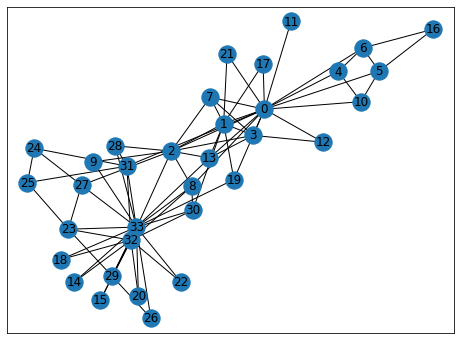

In [4]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [5]:

nodes = [{'name': str(i), 'club': g.node[i]['club']}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)

AttributeError: 'Graph' object has no attribute 'node'

In [ ]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #ddd; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [ ]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});